In [1]:
import arviz as az
import numpy as np
import pandas as pd
import pymc as pm
import pytensor

from climepi import epimod

pytensor.config.cxx = "/usr/bin/clang++"

In [2]:
parameters = {
    "eggs_per_female_per_day": {
        "curve_type": "briere",
        "priors": {
            "steepness": lambda: pm.Gamma(
                "steepness", alpha=0.1 * 28.36727, beta=0.1 * 1364.80283
            ),
            "temperature_min": lambda: pm.Gamma(
                "temperature_min", alpha=0.1 * 73.617115, beta=0.1 * 5.234959
            ),
            "temperature_max": lambda: pm.Gamma(
                "temperature_max", alpha=0.1 * 2605.73469, beta=0.1 * 81.36493
            ),
            "noise_precision": lambda: pm.Gamma(
                "noise_precision", alpha=0.1 * 2.197521, beta=0.1 * 2.948651
            ),
        },
        "attrs": {"long_name": "Eggs per female per day"},
    },
    "egg_to_adult_development_rate": {
        "curve_type": "briere",
        "priors": {
            "steepness": lambda: pm.Gamma(
                "steepness", alpha=0.1 * 19.69926, beta=0.1 * 132184.35192
            ),
            "temperature_min": lambda: pm.Gamma(
                "temperature_min", alpha=0.1 * 24.824235, beta=0.1 * 1.641687
            ),
            "temperature_max": lambda: pm.Gamma(
                "temperature_max", alpha=0.1 * 5189.7837, beta=0.1 * 137.7874
            ),
            "noise_precision": lambda: pm.Gamma(
                "noise_precision", alpha=0.1 * 7.295192761, beta=0.1 * 0.007662294
            ),
        },
        "attrs": {"long_name": "Egg to adult development rate", "units": "per day"},
    },
    "egg_to_adult_survival_probability": {
        "curve_type": "quadratic",
        "probability": True,
        "priors": {
            "steepness": lambda: pm.Gamma(
                "steepness", alpha=0.1 * 101.3912, beta=0.1 * 30194.2090
            ),
            "temperature_min": lambda: pm.Gamma(
                "temperature_min", alpha=0.1 * 154.75066, beta=0.1 * 20.14923
            ),
            "temperature_max": lambda: pm.Gamma(
                "temperature_max", alpha=0.1 * 3319.22251, beta=0.1 * 86.63973
            ),
            "noise_precision": lambda: pm.Gamma(
                "noise_precision", alpha=0.1 * 3.86616035, beta=0.1 * 0.01627125
            ),
        },
        "attrs": {"long_name": "Egg to adult survival probability"},
    },
    "adult_lifespan": {
        "curve_type": "quadratic",
        "priors": {
            "steepness": lambda: pm.Gamma(
                "steepness", alpha=0.01 * 73.17713, beta=0.01 * 58.83547
            ),
            "temperature_min": lambda: pm.Gamma(
                "temperature_min", alpha=0.01 * 1764.9573, beta=0.01 * 106.1194
            ),
            "temperature_max": lambda: pm.Gamma(
                "temperature_max", alpha=0.01 * 5601.4318, beta=0.01 * 175.8671
            ),
            "noise_precision": lambda: pm.Gamma(
                "noise_precision", alpha=0.01 * 1.904063, beta=0.01 * 15.663954
            ),
        },
        "attrs": {"long_name": "Adult lifespan", "units": "days"},
    },
    "biting_rate": {
        "curve_type": "briere",
        "priors": {
            "steepness": lambda: pm.Gamma(
                "steepness", alpha=0.1 * 15.61913, beta=0.1 * 57672.66973
            ),
            "temperature_min": lambda: pm.Gamma(
                "temperature_min", alpha=0.1 * 42.657272, beta=0.1 * 2.906991
            ),
            "temperature_max": lambda: pm.Gamma(
                "temperature_max", alpha=0.1 * 351.663454, beta=0.1 * 8.577776
            ),
            "noise_precision": lambda: pm.Gamma(
                "noise_precision", alpha=0.1 * 5.49987887, beta=0.1 * 0.01249048
            ),
        },
        "attrs": {"long_name": "Biting rate", "units": "per day"},
    },
    "human_to_mosquito_transmission_probability": {
        "curve_type": "briere",
        "priors": {
            "steepness": lambda: pm.Gamma(
                "steepness", alpha=0.5 * 87.88911, beta=0.5 * 167941.92094
            ),
            "temperature_min": lambda: pm.Gamma(
                "temperature_min", alpha=0.5 * 1.1497051, beta=0.5 * 0.7603777
            ),
            "temperature_max": lambda: pm.Gamma(
                "temperature_max", alpha=0.5 * 853.84870, beta=0.5 * 24.57488
            ),
            "noise_precision": lambda: pm.Gamma(
                "noise_precision", alpha=0.5 * 17.9579092, beta=0.5 * 0.7864043
            ),
        },
        "attrs": {
            "long_name": "Human to mosquito transmission probability",
            "units": "per bite",
        },
        "probability": True,
    },
    "mosquito_to_human_transmission_probability": {
        "curve_type": "briere",
        "priors": {
            "steepness": lambda: pm.Gamma(
                "steepness", alpha=0.5 * 25.96487, beta=0.5 * 26322.25052
            ),
            "temperature_min": lambda: pm.Gamma(
                "temperature_min", alpha=0.5 * 36.029388, beta=0.5 * 2.989315
            ),
            "temperature_max": lambda: pm.Gamma(
                "temperature_max", alpha=0.5 * 2236.38565, beta=0.5 * 68.19415
            ),
            "noise_precision": lambda: pm.Gamma(
                "noise_precision", alpha=0.5 * 10.9259890, beta=0.5 * 0.4362927
            ),
        },
        "attrs": {
            "long_name": "Mosquito to human transmission probability",
            "units": "per bite",
        },
        "probability": True,
    },
    "extrinsic_incubation_rate": {
        "curve_type": "briere",
        "priors": {
            "steepness": lambda: pm.Gamma(
                "steepness", alpha=0.5 * 6.45593, beta=0.5 * 61855.80928
            ),
            "temperature_min": lambda: pm.Gamma(
                "temperature_min", alpha=0.5 * 5.8000327, beta=0.5 * 0.5044451
            ),
            "temperature_max": lambda: pm.Gamma(
                "temperature_max", alpha=0.5 * 118.951801, beta=0.5 * 3.052254
            ),
            "noise_precision": lambda: pm.Gamma(
                "noise_precision", alpha=0.5 * 8.37446874, beta=0.5 * 0.01684306
            ),
        },
        "attrs": {"long_name": "Extrinsic incubation rate", "units": "per day"},
    },
}
data = epimod.get_mordecai_ae_aegypti_data()

In [3]:
def _suitability_function(
    eggs_per_female_per_day=None,
    egg_to_adult_development_rate=None,
    egg_to_adult_survival_probability=None,
    adult_lifespan=None,
    biting_rate=None,
    human_to_mosquito_transmission_probability=None,
    mosquito_to_human_transmission_probability=None,
    extrinsic_incubation_rate=None,
):
    R0_rel = (
        (biting_rate**2)
        * mosquito_to_human_transmission_probability
        * human_to_mosquito_transmission_probability
        * np.exp(-1 / (extrinsic_incubation_rate * adult_lifespan))
        * eggs_per_female_per_day
        * egg_to_adult_survival_probability
        * egg_to_adult_development_rate
        * (adult_lifespan**3)
    ) ** 0.5
    return R0_rel

In [4]:
suitability_model = epimod.ParameterizedSuitabilityModel(
    parameters=parameters, data=data, suitability_function=_suitability_function
)

In [5]:
idata_dict = suitability_model.fit_temperature_responses(tune=10000, draws=10000)

Fitting temperature response for parameter: eggs_per_female_per_day


Multiprocess sampling (4 chains in 4 jobs)
2025-07-01 14:20:47,803 [INFO]: mcmc.py(sample:932) >> Multiprocess sampling (4 chains in 4 jobs)
2025-07-01 14:20:47,803 [INFO]: mcmc.py(sample:932) >> Multiprocess sampling (4 chains in 4 jobs)
DEMetropolisZ: [steepness, temperature_min, temperature_max, noise_precision]
2025-07-01 14:20:47,804 [INFO]: mcmc.py(_print_step_hierarchy:284) >> DEMetropolisZ: [steepness, temperature_min, temperature_max, noise_precision]
2025-07-01 14:20:47,804 [INFO]: mcmc.py(_print_step_hierarchy:284) >> DEMetropolisZ: [steepness, temperature_min, temperature_max, noise_precision]


Output()

Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 4 seconds.
2025-07-01 14:20:51,856 [INFO]: mcmc.py(_sample_return:1075) >> Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 4 seconds.
2025-07-01 14:20:51,856 [INFO]: mcmc.py(_sample_return:1075) >> Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 4 seconds.


Fitting temperature response for parameter: egg_to_adult_development_rate


Multiprocess sampling (4 chains in 4 jobs)
2025-07-01 14:20:52,600 [INFO]: mcmc.py(sample:932) >> Multiprocess sampling (4 chains in 4 jobs)
2025-07-01 14:20:52,600 [INFO]: mcmc.py(sample:932) >> Multiprocess sampling (4 chains in 4 jobs)
DEMetropolisZ: [steepness, temperature_min, temperature_max, noise_precision]
2025-07-01 14:20:52,601 [INFO]: mcmc.py(_print_step_hierarchy:284) >> DEMetropolisZ: [steepness, temperature_min, temperature_max, noise_precision]
2025-07-01 14:20:52,601 [INFO]: mcmc.py(_print_step_hierarchy:284) >> DEMetropolisZ: [steepness, temperature_min, temperature_max, noise_precision]


Output()

Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 4 seconds.
2025-07-01 14:20:56,286 [INFO]: mcmc.py(_sample_return:1075) >> Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 4 seconds.
2025-07-01 14:20:56,286 [INFO]: mcmc.py(_sample_return:1075) >> Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 4 seconds.


Fitting temperature response for parameter: egg_to_adult_survival_probability


Multiprocess sampling (4 chains in 4 jobs)
2025-07-01 14:20:56,953 [INFO]: mcmc.py(sample:932) >> Multiprocess sampling (4 chains in 4 jobs)
2025-07-01 14:20:56,953 [INFO]: mcmc.py(sample:932) >> Multiprocess sampling (4 chains in 4 jobs)
DEMetropolisZ: [steepness, temperature_min, temperature_max, noise_precision]
2025-07-01 14:20:56,954 [INFO]: mcmc.py(_print_step_hierarchy:284) >> DEMetropolisZ: [steepness, temperature_min, temperature_max, noise_precision]
2025-07-01 14:20:56,954 [INFO]: mcmc.py(_print_step_hierarchy:284) >> DEMetropolisZ: [steepness, temperature_min, temperature_max, noise_precision]


Output()

Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 4 seconds.
2025-07-01 14:21:00,654 [INFO]: mcmc.py(_sample_return:1075) >> Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 4 seconds.
2025-07-01 14:21:00,654 [INFO]: mcmc.py(_sample_return:1075) >> Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 4 seconds.


Fitting temperature response for parameter: adult_lifespan


Multiprocess sampling (4 chains in 4 jobs)
2025-07-01 14:21:01,312 [INFO]: mcmc.py(sample:932) >> Multiprocess sampling (4 chains in 4 jobs)
2025-07-01 14:21:01,312 [INFO]: mcmc.py(sample:932) >> Multiprocess sampling (4 chains in 4 jobs)
DEMetropolisZ: [steepness, temperature_min, temperature_max, noise_precision]
2025-07-01 14:21:01,313 [INFO]: mcmc.py(_print_step_hierarchy:284) >> DEMetropolisZ: [steepness, temperature_min, temperature_max, noise_precision]
2025-07-01 14:21:01,313 [INFO]: mcmc.py(_print_step_hierarchy:284) >> DEMetropolisZ: [steepness, temperature_min, temperature_max, noise_precision]


Output()

Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 4 seconds.
2025-07-01 14:21:05,209 [INFO]: mcmc.py(_sample_return:1075) >> Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 4 seconds.
2025-07-01 14:21:05,209 [INFO]: mcmc.py(_sample_return:1075) >> Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 4 seconds.


Fitting temperature response for parameter: biting_rate


Multiprocess sampling (4 chains in 4 jobs)
2025-07-01 14:21:05,910 [INFO]: mcmc.py(sample:932) >> Multiprocess sampling (4 chains in 4 jobs)
2025-07-01 14:21:05,910 [INFO]: mcmc.py(sample:932) >> Multiprocess sampling (4 chains in 4 jobs)
DEMetropolisZ: [steepness, temperature_min, temperature_max, noise_precision]
2025-07-01 14:21:05,911 [INFO]: mcmc.py(_print_step_hierarchy:284) >> DEMetropolisZ: [steepness, temperature_min, temperature_max, noise_precision]
2025-07-01 14:21:05,911 [INFO]: mcmc.py(_print_step_hierarchy:284) >> DEMetropolisZ: [steepness, temperature_min, temperature_max, noise_precision]


Output()

Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 3 seconds.
2025-07-01 14:21:09,243 [INFO]: mcmc.py(_sample_return:1075) >> Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 3 seconds.
2025-07-01 14:21:09,243 [INFO]: mcmc.py(_sample_return:1075) >> Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 3 seconds.


Fitting temperature response for parameter: human_to_mosquito_transmission_probability


Multiprocess sampling (4 chains in 4 jobs)
2025-07-01 14:21:10,041 [INFO]: mcmc.py(sample:932) >> Multiprocess sampling (4 chains in 4 jobs)
2025-07-01 14:21:10,041 [INFO]: mcmc.py(sample:932) >> Multiprocess sampling (4 chains in 4 jobs)
DEMetropolisZ: [steepness, temperature_min, temperature_max, noise_precision]
2025-07-01 14:21:10,042 [INFO]: mcmc.py(_print_step_hierarchy:284) >> DEMetropolisZ: [steepness, temperature_min, temperature_max, noise_precision]
2025-07-01 14:21:10,042 [INFO]: mcmc.py(_print_step_hierarchy:284) >> DEMetropolisZ: [steepness, temperature_min, temperature_max, noise_precision]


Output()

Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 3 seconds.
2025-07-01 14:21:13,280 [INFO]: mcmc.py(_sample_return:1075) >> Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 3 seconds.
2025-07-01 14:21:13,280 [INFO]: mcmc.py(_sample_return:1075) >> Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 3 seconds.


Fitting temperature response for parameter: mosquito_to_human_transmission_probability


Multiprocess sampling (4 chains in 4 jobs)
2025-07-01 14:21:13,939 [INFO]: mcmc.py(sample:932) >> Multiprocess sampling (4 chains in 4 jobs)
2025-07-01 14:21:13,939 [INFO]: mcmc.py(sample:932) >> Multiprocess sampling (4 chains in 4 jobs)
DEMetropolisZ: [steepness, temperature_min, temperature_max, noise_precision]
2025-07-01 14:21:13,940 [INFO]: mcmc.py(_print_step_hierarchy:284) >> DEMetropolisZ: [steepness, temperature_min, temperature_max, noise_precision]
2025-07-01 14:21:13,940 [INFO]: mcmc.py(_print_step_hierarchy:284) >> DEMetropolisZ: [steepness, temperature_min, temperature_max, noise_precision]


Output()

Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 3 seconds.
2025-07-01 14:21:17,183 [INFO]: mcmc.py(_sample_return:1075) >> Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 3 seconds.
2025-07-01 14:21:17,183 [INFO]: mcmc.py(_sample_return:1075) >> Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 3 seconds.


Fitting temperature response for parameter: extrinsic_incubation_rate


Multiprocess sampling (4 chains in 4 jobs)
2025-07-01 14:21:17,801 [INFO]: mcmc.py(sample:932) >> Multiprocess sampling (4 chains in 4 jobs)
2025-07-01 14:21:17,801 [INFO]: mcmc.py(sample:932) >> Multiprocess sampling (4 chains in 4 jobs)
DEMetropolisZ: [steepness, temperature_min, temperature_max, noise_precision]
2025-07-01 14:21:17,802 [INFO]: mcmc.py(_print_step_hierarchy:284) >> DEMetropolisZ: [steepness, temperature_min, temperature_max, noise_precision]
2025-07-01 14:21:17,802 [INFO]: mcmc.py(_print_step_hierarchy:284) >> DEMetropolisZ: [steepness, temperature_min, temperature_max, noise_precision]


Output()

Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 3 seconds.
2025-07-01 14:21:21,068 [INFO]: mcmc.py(_sample_return:1075) >> Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 3 seconds.
2025-07-01 14:21:21,068 [INFO]: mcmc.py(_sample_return:1075) >> Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 3 seconds.


In [6]:
plots = suitability_model.plot_fitted_temperature_responses(
    temperature_vals=np.linspace(0, 50, 500)
).cols(2)
plots[0].opts(ylim=(0, 15))
plots[1].opts(ylim=(0, 0.2))
plots

:Layout
   .Overlay.I    :Overlay
      .Curve.Median_response               :Curve   [temperature]   (Eggs per female per day)
      .Area.A_95_percent_credible_interval :Area   [temperature]   (lower,upper)
      .Scatter.I                           :Scatter   [temperature]   (trait)
   .Overlay.II   :Overlay
      .Curve.Median_response               :Curve   [temperature]   (Egg to adult development rate)
      .Area.A_95_percent_credible_interval :Area   [temperature]   (lower,upper)
      .Scatter.I                           :Scatter   [temperature]   (trait)
   .Overlay.III  :Overlay
      .Curve.Median_response               :Curve   [temperature]   (Egg to adult survival probability)
      .Area.A_95_percent_credible_interval :Area   [temperature]   (lower,upper)
      .Scatter.I                           :Scatter   [temperature]   (trait)
   .Overlay.IV   :Overlay
      .Curve.Median_response               :Curve   [temperature]   (Adult lifespan)
      .Area.A_95_percent_credible_interval :Area   [temperature]   (lower,upper)
      .Scatter.I                           :Scatter   [temperature]   (trait)
   .Overlay.V    :Overlay
      .Curve.Median_response               :Curve   [temperature]   (Biting rate)
      .Area.A_95_percent_credible_interval :Area   [temperature]   (lower,upper)
      .Scatter.I                           :Scatter   [temperature]   (trait)
   .Overlay.VI   :Overlay
      .Curve.Median_response               :Curve   [temperature]   (Human to mosquito transmission probability)
      .Area.A_95_percent_credible_interval :Area   [temperature]   (lower,upper)
      .Scatter.I                           :Scatter   [temperature]   (trait)
   .Overlay.VII  :Overlay
      .Curve.Median_response               :Curve   [temperature]   (Mosquito to human transmission probability)
      .Area.A_95_percent_credible_interval :Area   [temperature]   (lower,upper)
      .Scatter.I                           :Scatter   [temperature]   (trait)
   .Overlay.VIII :Overlay
      .Curve.Median_response               :Curve   [temperature]   (Extrinsic incubation rate)
      .Area.A_95_percent_credible_interval :Area   [temperature]   (lower,upper)
      .Scatter.I                           :Scatter   [temperature]   (trait)

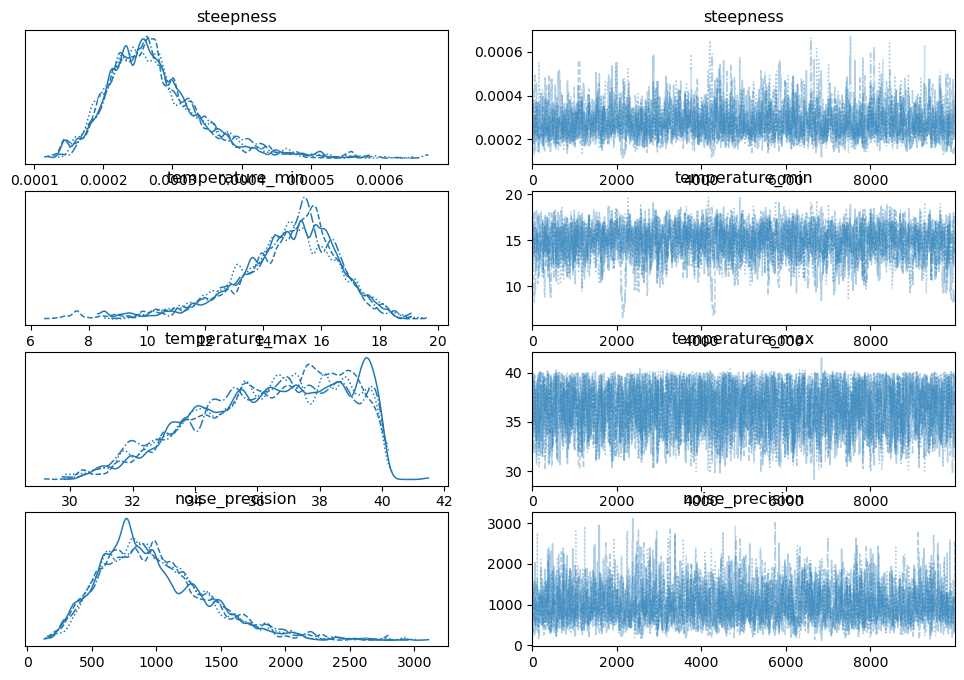

In [7]:
az.plot_trace(idata_dict["biting_rate"]);

In [8]:
for parameter_name, idata in idata_dict.items():
    print(f"Parameter: {parameter_name}")
    print(az.rhat(idata))

Parameter: eggs_per_female_per_day
<xarray.Dataset> Size: 32B
Dimensions:          ()
Data variables:
    steepness        float64 8B 1.004
    temperature_min  float64 8B 1.003
    temperature_max  float64 8B 1.003
    noise_precision  float64 8B 1.001
Parameter: egg_to_adult_development_rate
<xarray.Dataset> Size: 32B
Dimensions:          ()
Data variables:
    steepness        float64 8B 1.003
    temperature_min  float64 8B 1.003
    temperature_max  float64 8B 1.001
    noise_precision  float64 8B 1.002
Parameter: egg_to_adult_survival_probability
<xarray.Dataset> Size: 32B
Dimensions:          ()
Data variables:
    steepness        float64 8B 1.002
    temperature_min  float64 8B 1.002
    temperature_max  float64 8B 1.001
    noise_precision  float64 8B 1.001
Parameter: adult_lifespan
<xarray.Dataset> Size: 32B
Dimensions:          ()
Data variables:
    steepness        float64 8B 1.001
    temperature_min  float64 8B 1.002
    temperature_max  float64 8B 1.001
    noise_preci

In [9]:
for parameter_name, idata in idata_dict.items():
    print(f"Parameter: {parameter_name}")
    print(az.ess(idata))

Parameter: eggs_per_female_per_day
<xarray.Dataset> Size: 32B
Dimensions:          ()
Data variables:
    steepness        float64 8B 1.996e+03
    temperature_min  float64 8B 1.994e+03
    temperature_max  float64 8B 2.275e+03
    noise_precision  float64 8B 2.546e+03
Parameter: egg_to_adult_development_rate
<xarray.Dataset> Size: 32B
Dimensions:          ()
Data variables:
    steepness        float64 8B 2.093e+03
    temperature_min  float64 8B 2.082e+03
    temperature_max  float64 8B 2.325e+03
    noise_precision  float64 8B 2.256e+03
Parameter: egg_to_adult_survival_probability
<xarray.Dataset> Size: 32B
Dimensions:          ()
Data variables:
    steepness        float64 8B 2.817e+03
    temperature_min  float64 8B 3.156e+03
    temperature_max  float64 8B 2.809e+03
    noise_precision  float64 8B 2.808e+03
Parameter: adult_lifespan
<xarray.Dataset> Size: 32B
Dimensions:          ()
Data variables:
    steepness        float64 8B 2.351e+03
    temperature_min  float64 8B 2.142e+

In [10]:
suitability_model.construct_suitability_table(
    num_samples=10000, temperature_vals=np.linspace(0, 50, 500)
)
# suitability_table.mean(dim="sample").hvplot() * suitability_table.quantile(
#     dim="sample", q=[0.025, 0.975]
# ).hvplot.line(by="quantile", line_dash="dashed", color="red").opts(xlim=(10, 40))
# suitability_table.mean(dim="sample").hvplot() * az.hdi(
#     suitability_table.suitability, hdi_prob=0.95, input_core_dims=[("sample",)]
# ).hvplot.line(by="hdi", line_dash="dashed", color="red").opts(xlim=(10, 40))
# suitability_table_hdi = az.hdi(
#     suitability_table.suitability, hdi_prob=0.95, input_core_dims=[("sample",)]
# )
# suitability_table.mean(dim="sample").hvplot() * (
#     suitability_table_hdi / suitability_table_hdi.max(dim="temperature")
# ).hvplot.line(by="hdi", line_dash="dashed", color="red").opts(xlim=(10, 40))

<xarray.Dataset> Size: 40MB
Dimensions:      (temperature: 500, sample: 10000)
Coordinates:
  * temperature  (temperature) float64 4kB 0.0 0.1002 0.2004 ... 49.8 49.9 50.0
  * sample       (sample) int64 80kB 0 1 2 3 4 5 ... 9995 9996 9997 9998 9999
Data variables:
    suitability  (temperature, sample) float64 40MB 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [11]:
(
    suitability_model.reduce(stat="mean", rescale=True).plot_suitability_region()
    * suitability_model.reduce(
        stat="quantile", quantile=[0.025, 0.975], rescale="mean"
    ).plot_suitability_region(color="red", line_dash="dashed", by="quantile")
).opts(xlim=(10, 40))

:Overlay
   .Curve.I     :Curve   [temperature]   (Suitability)
   .NdOverlay.I :NdOverlay   [quantile]
      :Curve   [temperature]   (Suitability)

In [12]:
suitability_model.reduce(suitability_threshold=0, stat="median").temperature_range

[np.float64(17.935871743486974), np.float64(33.26653306613227)]